# **Histogram Creation With Spectrograms and Class Confusion Matrices**

This file is for taking in the CSVs that have been infered from the model and then outputing Histograms with corresponding Spectrograms and class confusion matrices.

**Histograms:**

The goal is to grab the total predictions from the analysis CSVs and create an histogram out of those totals. A reference line will be added if the CSV containing the labels indicates that there was a class present. This reference will allow for quick checking of model accuracy for each 1 minute wav file. Next to the created histogram will be its spectrogram.

**Confusion Matrices:**

At the end of the program, we have the data required to create the class confusion matrices. So, the program outputs a Confusion matrix for each class in order to more easily visualize the performance of that given CNN. These matrices can then be used to compare two (or more) different CNN's and demonstrate their proficencies and downfalls.

In [ ]:
# Imports
import pandas as pd
import os
import time
import glob
import csv
import openpyxl
from openpyxl.utils.dataframe import dataframe_to_rows
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
from sklearn import metrics

In [ ]:
# Importing Drive for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# For gathering local drive data. Path will differ for other users
%cd
%cd /content/drive/Shareddrives/cs479 ABGQI/Old Model Statistical Analysis/CSVs

# For getting the csvs and their names
csv_dirs = [os.path.normpath(i) for i in glob.glob('./1min_predictions/*.csv')]
csv_pred_names = []
for csv in range(len(csv_dirs)):
  csv_pred_names.append(csv_dirs[csv].split('/')[1])

# Threshold for determining what predictions are valid from the CNN
threshold_A = 0.74
threshold_B = 0.4
threshold_G = 0.83
threshold_I = 0.17
threshold_Q = 0.83

# Directories
labeled_csv_dir = '../labeled_data.csv'
results_csvs_dir = './labeled_data_hists_wSpecs/'
result_confusion_dir = '../Confusion Matrices/'
spec_dir = '../1min_spectrgrams/'
spec_dir_names = [x[0] for x in os.walk(spec_dir)]
spec_dir_names = spec_dir_names[1:]

# Gather all of the spectrogram names
spec_names = []
for i in range(452):
  spec_names.append(spec_dir_names[i].split('/')[2])
  spec_dir_names[i] = spec_dir_names[i] + '/0.png'


/root
/content/drive/Shareddrives/cs479 ABGQI/Old Model Statistical Analysis/CSVs


In [ ]:
# Ensure the CSVs have been found
print('Number of files in the directory:', len(csv_dirs))

Number of files in the directory: 452


In [ ]:
'''
Set up initial data needed before looking at all of the prediction CSVs
'''

# Get the labeled data csv and add it to a pandas dataframe
data_labeled = pd.read_csv(labeled_csv_dir, index_col=0)
data_labeled = pd.DataFrame(data_labeled, columns=data_labeled.columns)

# Create an openpyxl workbook for the labeled data
workbook_labeled = openpyxl.Workbook()
workbook_labeled.create_sheet(title="Sheet1")
sheet_labeled = workbook_labeled.active

# Create the excel sheets from the labeled pandas dataframe
for rows in dataframe_to_rows(data_labeled, header=True):
  sheet_labeled.append(rows)

# Initialize the arrays for file names and class labeled class occurances
class_names = ["Anthropophony", "Biophony", "Geophony", "Interference", "Quiet"]
file_names = []
file_names_no_csv = []
labeled_occurs = np.zeros((5, 452), int)

# Prediction arrays for each class
pred_data_A = np.zeros((452,), int)
pred_data_B = np.zeros((452,), int)
pred_data_G = np.zeros((452,), int)
pred_data_I = np.zeros((452,), int)
pred_data_Q = np.zeros((452,), int)

# Loop through each class vertically, grabing all of the labeled data for each class
for i in range (5):
  for j in range (452):
    labeled_occurs[i][j] = sheet_labeled.cell(row=j+3, column=i+20).value

# Loop vertically through the name column to grab all of the names for the files
for i in range(452):
  temp_str = sheet_labeled.cell(row=i+3, column=1).value
  temp_str = temp_str.split('.')[0]  # get csv file name
  file_names_no_csv.append(temp_str)
  temp_str += ".csv"
  file_names.append(temp_str)

1 . CSV name: s2lam001_230713_2023-07-14_21-20

2 . CSV name: s2lam001_230713_2023-07-18_10-30

3 . CSV name: s2lam001_230713_2023-07-14_23-00

4 . CSV name: s2lam002_230807_2023-08-11_05-40

5 . CSV name: s2lam002_230807_2023-08-11_11-00

6 . CSV name: s2lam002_230807_2023-08-11_10-40

7 . CSV name: s2lam002_230807_2023-08-11_12-20

8 . CSV name: s2lam002_230807_2023-08-11_14-00

9 . CSV name: s2lam002_230807_2023-08-11_04-20

10 . CSV name: s2lam002_230807_2023-08-11_15-40

11 . CSV name: s2lam002_230807_2023-08-14_12-40

12 . CSV name: s2lam002_230807_2023-08-08_07-50

13 . CSV name: s2lam002_230807_2023-08-09_06-40

14 . CSV name: s2lam002_230807_2023-08-09_06-00

15 . CSV name: s2lam002_230807_2023-08-09_06-20

16 . CSV name: s2lam002_230807_2023-08-14_07-00

17 . CSV name: s2lam002_230807_2023-08-12_10-20

18 . CSV name: s2lam002_230807_2023-08-11_07-20

19 . CSV name: s2lam002_230807_2023-08-09_07-50

20 . CSV name: s2lam002_230807_2023-08-13_05-40

21 . CSV name: s2lam002_23080

<ipython-input-27-ea494d349909>:81: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,3))


22 . CSV name: s2lam002_230807_2023-08-08_06-50

23 . CSV name: s2lam002_230807_2023-08-08_05-10

24 . CSV name: s2lam002_230807_2023-08-11_10-50

25 . CSV name: s2lam002_230807_2023-08-08_12-40

26 . CSV name: s2lam002_230807_2023-08-08_13-20

27 . CSV name: s2lam003_230807_2023-08-11_15-00

28 . CSV name: s2lam016_230829_2023-09-06_07-20

29 . CSV name: s2lam016_230829_2023-09-06_06-10

30 . CSV name: s2lam016_230829_2023-09-06_05-30

31 . CSV name: s2lam016_230829_2023-09-06_05-10

32 . CSV name: s2lam016_230829_2023-09-06_05-00

33 . CSV name: s2lam016_230829_2023-09-05_16-40

34 . CSV name: s2lam016_230829_2023-09-05_16-30

35 . CSV name: s2lam016_230829_2023-09-05_16-20

36 . CSV name: s2lam016_230829_2023-09-05_16-10

37 . CSV name: s2lam016_230829_2023-09-05_16-00

38 . CSV name: s2lam016_230829_2023-09-05_15-50

39 . CSV name: s2lam016_230829_2023-09-05_15-40

40 . CSV name: s2lam016_230829_2023-09-05_15-30

41 . CSV name: s2lam016_230829_2023-09-05_15-20

42 . CSV name: s2lam

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

<Figure size 1400x300 with 0 Axes>

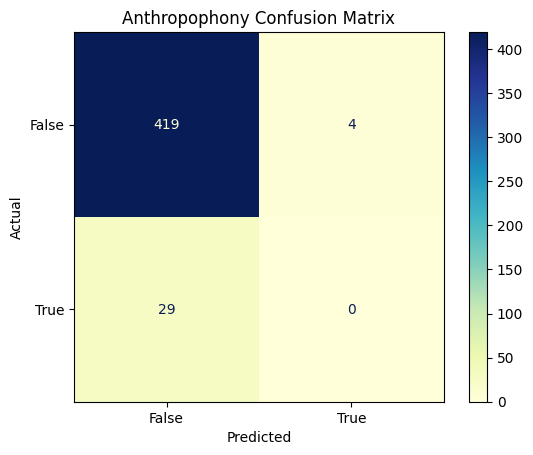

<Figure size 640x480 with 0 Axes>

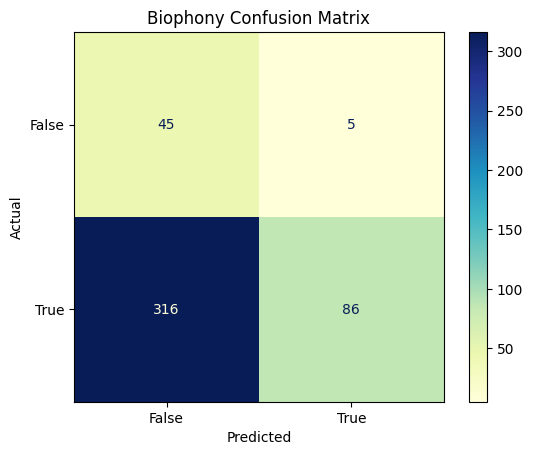

<Figure size 640x480 with 0 Axes>

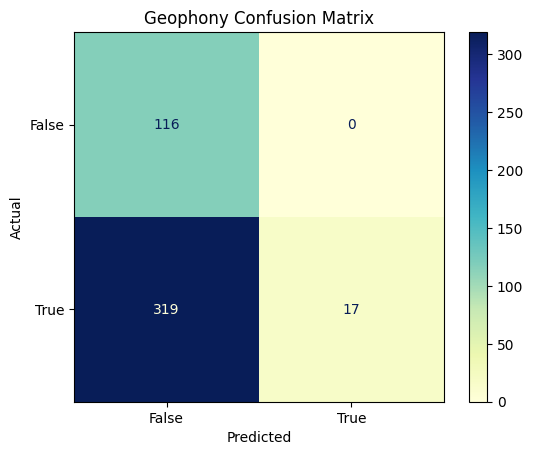

<Figure size 640x480 with 0 Axes>

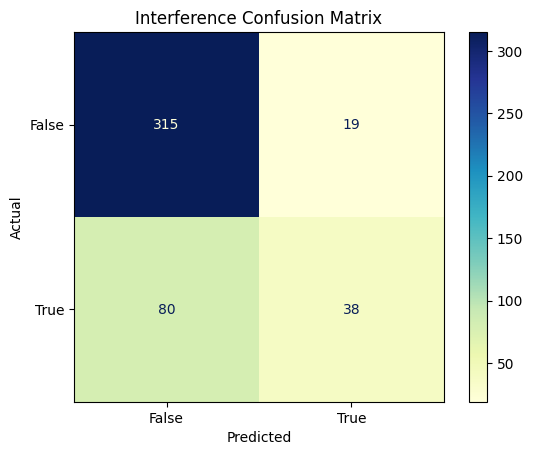


Total Elapsed Time for Computation:  210.0186002254486 seconds


<Figure size 640x480 with 0 Axes>

In [ ]:
'''
We need to look at each 1 min prediction CSV, find the predictions for each class, make a binary array
using a predifined threshold, and then using the previously gathered labeled data and the threshed data
we can make histograms for each 1 min file and a confusion matrix for each class for all of the files.
'''

start = time.time() # For timing the program

# Iterate through each CSV
for csv in range(len(file_names)):

  # First find the right csv prediction file in order to compare the label
  # to the prediction. Loop uses the current file label, and compares to the
  # available csv predictions
  count = 0
  while(file_names[csv] != csv_pred_names[count]):
    count += 1
    # If the file is not found after looking at all of the available files, output
    # an error and exit
    if count >= len(csv_pred_names):
      print("CSV not found!")
      exit()

  # Do the same as above to find the spectrogram to be used
  spec_count = 0
  while(file_names_no_csv[csv] != spec_names[spec_count]):
    spec_count += 1
    # If the file is not found after looking at all of the available files, output
    # an error and exit
    if spec_count >= len(spec_names):
      print("Spectrogram not found!")
      exit()

  # Once the correct csv prediction has been found, isolate the name and create
  # the name for the histogram output
  csv_name = csv_pred_names[count].split('.')[0]  # get rid of ".csv" name
  out_path_csv = os.path.join(results_csvs_dir, csv_name + '_HIST.png')

  # Display the csv being worked on for each loop
  print(csv+1, ". CSV name:", csv_name)

  # Does the prediction exist already?
  if os.path.isfile(out_path_csv):
      print("OCCURANCE ALREADY CREATED\n")
      continue
  else:
    print() # For better visuals when outputing info above, can be ignored

    # Read from the current CSV and add it to a new pandas datafrome
    data_pred = pd.read_csv(csv_dirs[count], index_col=0)
    data_pred = pd.DataFrame(data_pred, columns=data_pred.columns)

    # Create a workbook for predictions
    workbook_pred = openpyxl.Workbook()
    workbook_pred.create_sheet(title="Sheet1")
    sheet_pred = workbook_pred.active

    # Create the excel sheets from the prediction pandas dataframe
    for rows in dataframe_to_rows(data_pred, header=True):
      sheet_pred.append(rows)

    # Loop for each class in order to take from the prediction csv and put
    # each class prediction value (0-1) into a np array
    classes = np.zeros((5,))

    for i in range(5):
      classes[i] = sheet_pred.cell(row=3, column=i+2).value

    # Create a thresholded binary array with class specific thresholds
    threshed_data = np.zeros((5,), int)
    threshed_data[0] = classes[0] >= threshold_A
    threshed_data[1] = classes[1] >= threshold_B
    threshed_data[2] = classes[2] >= threshold_G
    threshed_data[3] = classes[3] >= threshold_I
    threshed_data[4] = classes[4] >= threshold_Q

    # Also copy over the thresholded data for prediction arrays to be used to create
    # confusion matrices
    pred_data_A[csv] = threshed_data[0]
    pred_data_B[csv] = threshed_data[1]
    pred_data_G[csv] = threshed_data[2]
    pred_data_I[csv] = threshed_data[3]
    pred_data_Q[csv] = threshed_data[4]

    '''
    Create and output the histograms
    '''
    # Create the plot for the histogram and its corresponding spectrogram
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,3))

    # Get and then add the spectrogram image
    ax[0].imshow(matplotlib.image.imread(spec_dir_names[spec_count]))
    ax[0].set_title(spec_names[spec_count] + " Spectrogram")

    # Create the histogram
    ax[1].bar(class_names, threshed_data, width=0.75)

    # Loop adds a red indicator line if that class was labeled as present
    # in the 1 min wav file
    for i in range(5):
      # If a class occured in the 1 min file, add a vertical red line at that
      # class bin
      if labeled_occurs[i][csv] > 0:
        ax[1].axvline(i, color='r')

    ax[1].set_title(csv_name + " Histogram")
    fig.savefig(out_path_csv) # For saving png of each histogram
    plt.clf() # Clear the plot for the next histogram and spectrogram

'''
Create and output the confusion matrix
'''

# Anthro confusion matrix
confus_mat = metrics.confusion_matrix(labeled_occurs[0][:], pred_data_A)
cm_dis = metrics.ConfusionMatrixDisplay(confusion_matrix=confus_mat, display_labels=[False, True])
cm_dis.plot(cmap="YlGnBu")
plt.title("Anthropophony Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()
result_confusion_dir_A = result_confusion_dir + 'anthropophony_confusion_matrix.png'
cm_dis.figure_.savefig(result_confusion_dir_A) # For saving png of each confusion matrix
plt.clf() # Clear the plot for the next matrix

# Bio confusion matrix
confus_mat = metrics.confusion_matrix(labeled_occurs[1][:], pred_data_B)
cm_dis = metrics.ConfusionMatrixDisplay(confusion_matrix=confus_mat, display_labels=[False, True])
cm_dis.plot(cmap="YlGnBu")
plt.title("Biophony Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()
result_confusion_dir_B = result_confusion_dir + 'biophony_confusion_matrix.png'
cm_dis.figure_.savefig(result_confusion_dir_B) # For saving png of each confusion matrix
plt.clf() # Clear the plot for the next matrix

# Geo confusion matrix
confus_mat = metrics.confusion_matrix(labeled_occurs[2][:], pred_data_G)
cm_dis = metrics.ConfusionMatrixDisplay(confusion_matrix=confus_mat, display_labels=[False, True])
cm_dis.plot(cmap="YlGnBu")
plt.title("Geophony Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()
result_confusion_dir_G = result_confusion_dir + 'geophony_confusion_matrix.png'
cm_dis.figure_.savefig(result_confusion_dir_G) # For saving png of each confusion matrix
plt.clf() # Clear the plot for the next matrix

# Interference confusion matrix
confus_mat = metrics.confusion_matrix(labeled_occurs[3][:], pred_data_I)
cm_dis = metrics.ConfusionMatrixDisplay(confusion_matrix=confus_mat, display_labels=[False, True])
cm_dis.plot(cmap="YlGnBu")
plt.title("Interference Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()
result_confusion_dir_I = result_confusion_dir + 'interference_confusion_matrix.png'
cm_dis.figure_.savefig(result_confusion_dir_I) # For saving png of each confusion matrix
plt.clf() # Clear the plot for the next matrix

end = time.time()
print("\nTotal Elapsed Time for Computation: ", end - start, "seconds")